In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Welcome to JupyROOT 6.12/06


Open the path which contains all of the output files from the test data set. 

In [2]:
extMounted = False
try:
    file_path = "/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/"
    files_byRun = []
    for file in os.listdir(file_path):
        if ( (".root" in file) and ("result" not in file) ):
            file = file_path+file
            files_byRun.append(file)

    fileList = r.TList() #not used for anything as yet, but nice to have
    for x in files_byRun:
    #    print(x)
        fi = r.TFile(x)
        fileList.Add(fi)
    extMounted = True
except:
    print("External Drive Not Mounted")

External Drive Not Mounted


Using hadd.sh, we merged all of these files together into one output, which we will run through now:

In [3]:
#f = r.TFile("/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/result.root") #processed output of hadd.sh
f = r.TFile("./result_histOnly.root") #processed output of hadd.sh
f2 = r.TFile("./result_python.root")

prodString="v9_05_00"

In [4]:
f.cd("farline/calo1")
#f.ls()

True

Print all of the embedded histograms.

2,098,763,780 Entries in these histograms


Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_farlineHistograms.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_farlineHistograms.root has been created


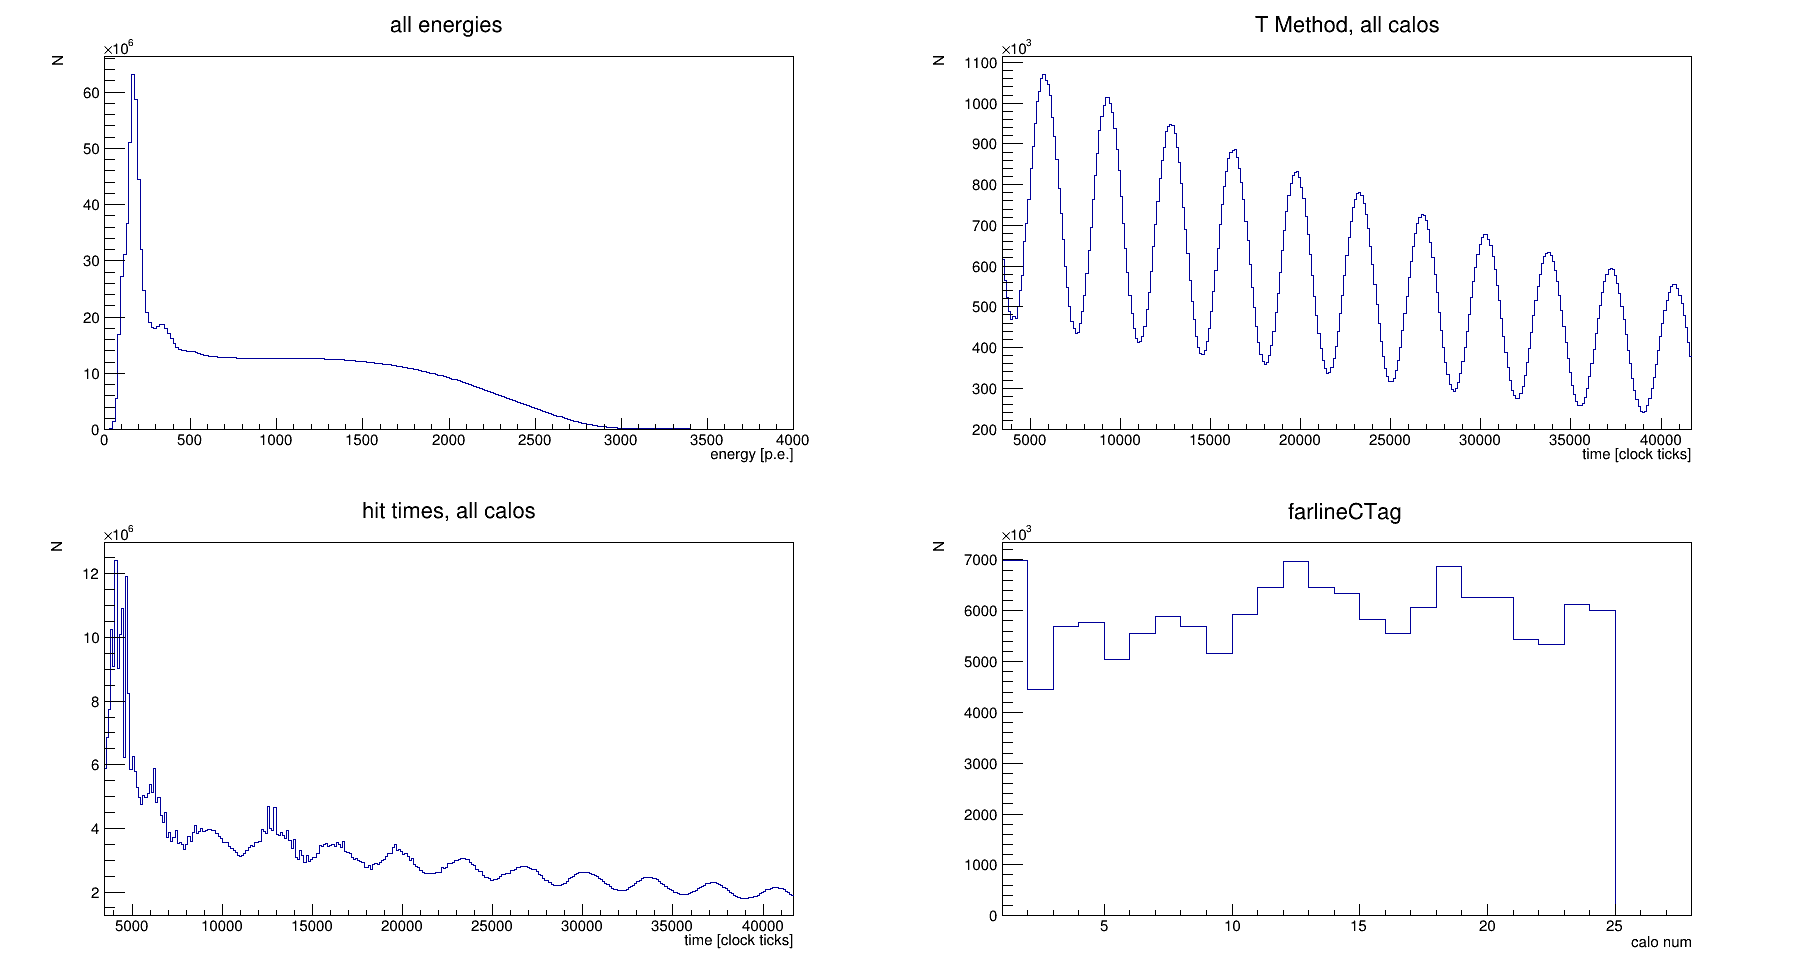

In [5]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = f.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
c.Draw()

c.cd(2)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = f.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes.GetXaxis().SetRange(30,350)
allCaloTimes.Draw()

c.cd(4)
farlineCtag = f.Get("farline").Get("farlineCTag").Clone()
farlineCtag.Draw()

c.Draw()
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.png")
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.root")

print("{:,}".format(int(allCaloEnergies.GetEntries())), "Entries in these histograms")

# Now lets make a wiggle plot of all of the calos

In [6]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [7]:
func = r.TF1("func", blinded_wiggle, 30,500,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(1500,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(1000)

### Five parameter fit

0.0 560000.0
0.0 700.0
 FCN=4460.93 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS        1224 TOTAL
                     EDM=1.54686e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            8.66767e+05   1.01861e+02  -9.89997e-03   9.49717e-11
   2  #tau         6.43366e+01   4.28930e-03  -8.21056e-08   1.55222e-05
   3  A            4.11492e-01   8.60290e-05  -2.17386e-08   2.54462e-04
   4  R           -1.14576e+01   2.40266e+00   7.80054e-05   2.38669e-10
   5  #phi         5.22314e+00   3.90872e-04   3.90872e-04  -1.06621e-03
 FCN=4460.93 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         282 TOTAL
                     EDM=9.96292e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N   

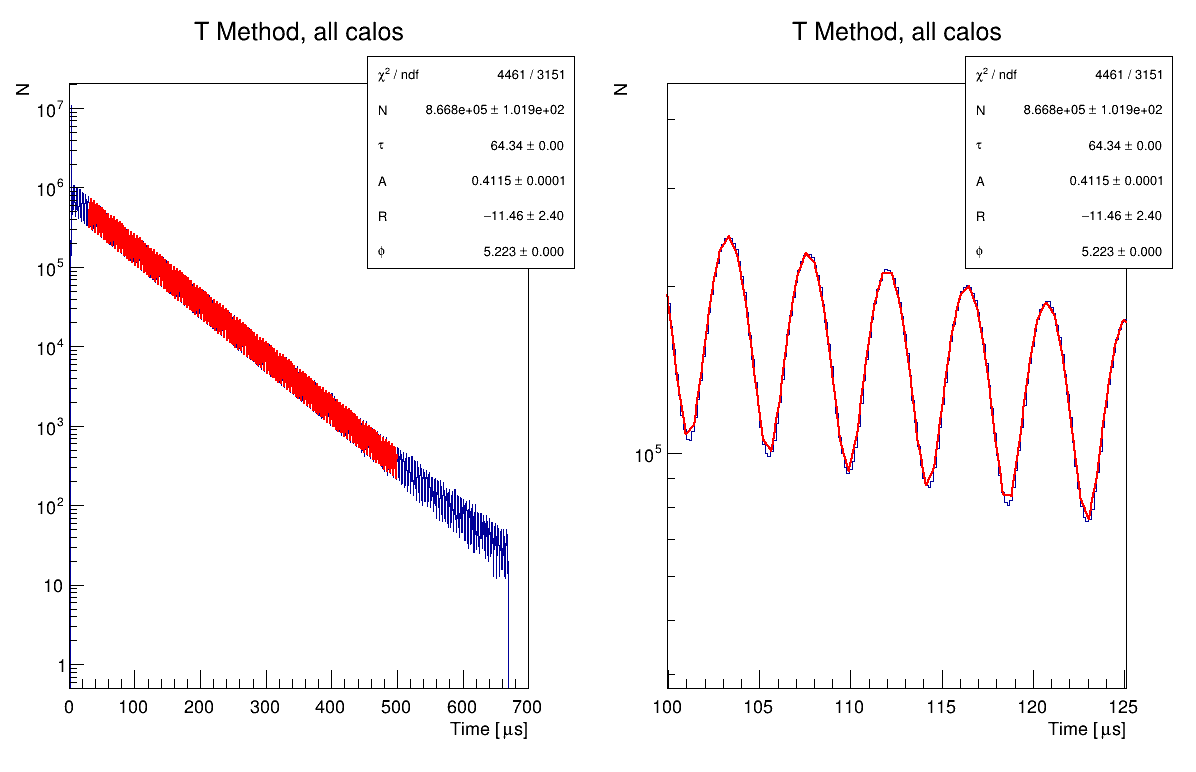

In [8]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

for fit in range(2):
    allCaloWiggle.Fit("func","REM")

allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_TmethodWiggleFitAllCalos.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_TmethodWiggleFitAllCalos.root has been created


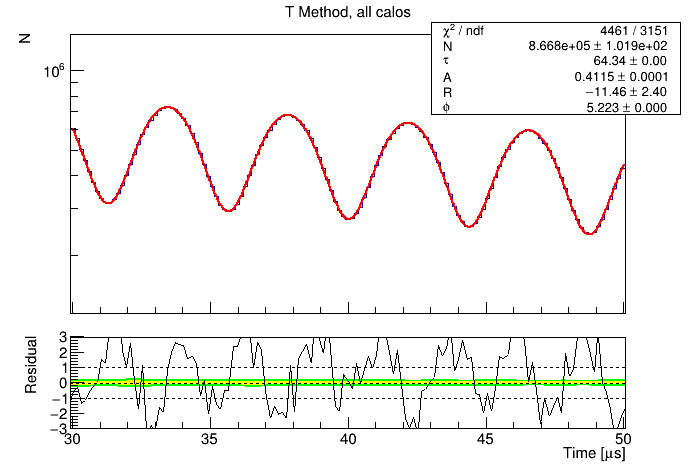

In [9]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas()
allCaloWiggle.Draw()
c3.SetLogy()
c3.Draw()

rp1 = r.TRatioPlot(allCaloWiggle)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-3,3)

allCaloWiggle.GetXaxis().SetRangeUser(30,50)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.png")
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.root")

### Fourier transform of the 5-parameter residuals.

4700
4498 [(30.010638297872337, -440.12934640957974), (30.159574468085104, -203.38181100436486), (30.30851063829787, -956.289584013226), (30.457446808510635, -768.1329920589342), (30.606382978723403, -369.03865439491346)]
4498 669.7659574468083 29.936186768587454 699.7021442153958
0.14890305856976618 0.0014930588646399191
13.431557546300713 6.7157787731503555


Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_5ParamResiduals.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_5ParamResiduals.root has been created


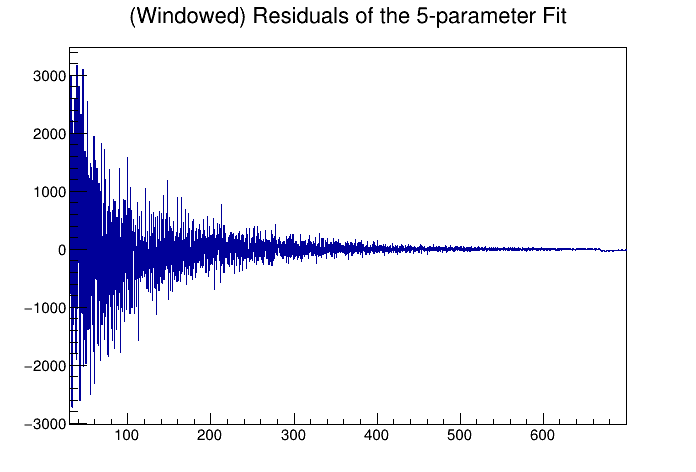

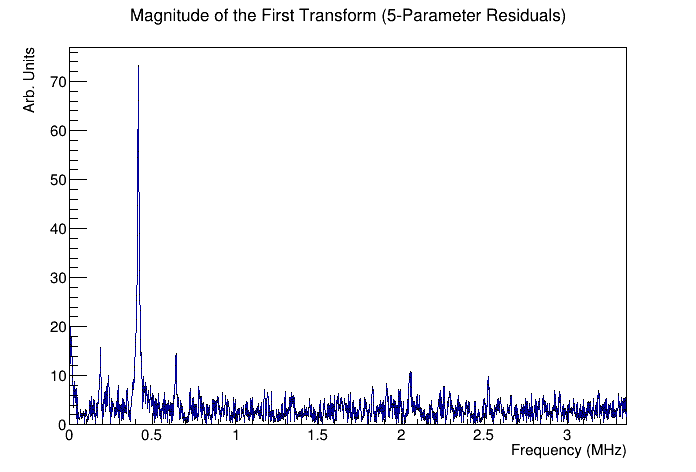

In [10]:
c3 = r.TCanvas()
residuals5param = residuals.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
residVec = []
for i in range(nBins):
    binCenterX = allCaloWiggle.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30):
        residVec.append( (binCenterX, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX) ) )
        residuals5param.SetBinContent(i, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
residuals5param.Delete()
residuals5param = htest
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

#apply a windows function to try to get rid of the imaginary peaks
welchVec = []
for i in range(nBins):
    unwindowed = residuals5param.GetBinContent(i)
    welch = 1# - ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
    welchVec.append(welch)
    residuals5param.SetBinContent(i, unwindowed *  welch)
    
residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,700)
residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
c3.Draw()    
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (5-Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

#c2.SetLogy()
c2.Draw()
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


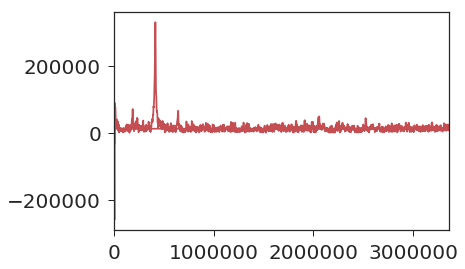

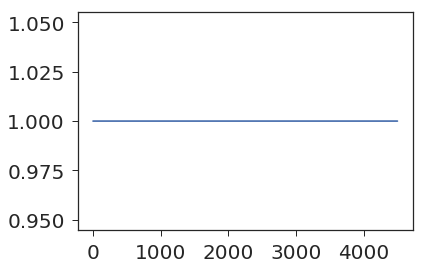

In [11]:
plt.plot(bins)
ding = np.fft.fft(np.array(bins))
plt.plot(ding)

n = len(bins)
d = (centers[1] - centers[0])*math.pow(10.0,-6)

freq = np.fft.fftfreq(n, d)
freq

plt.plot(freq,np.abs(ding),'-')
plt.xlim(0,6.7157787731503555 / 2 *10.**6)
plt.show()

plt.plot(welchVec)
plt.show()

4498 [(30.010638297872337, -440.12934640957974), (30.159574468085104, -203.38181100436486), (30.30851063829787, -956.289584013226), (30.457446808510635, -768.1329920589342), (30.606382978723403, -369.03865439491346)]


Warning in <TDirectoryFile::Append>: Replacing existing TH1: htest (Potential memory leak).


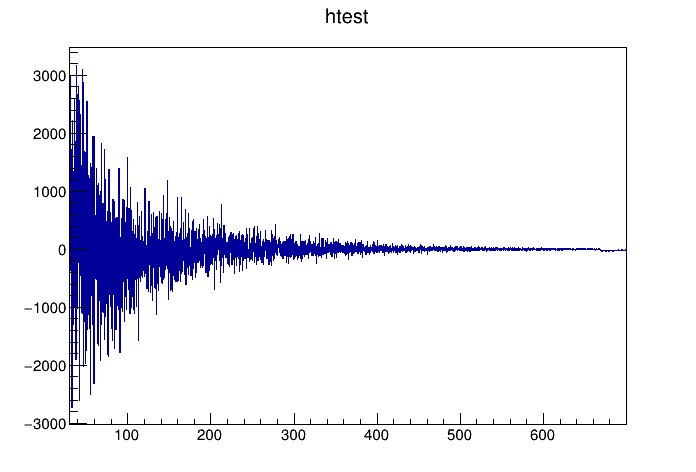

In [12]:
print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
c = r.TCanvas()
htest.Draw()
c.Draw()

### 13 parameter fit

In [13]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    A2       = p[6]
    A3       = p[7]
    lifeCBO  = p[8]
    omegaCBO = p[9]
    phiCBO1  = p[10]
    phiCBO2  = p[11]
    phiCBO3  = p[12]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1-math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    ACBO = asym * (1 - math.exp(-time/lifeCBO) * A2 * math.cos(omegaCBO*time + phiCBO2))
    phiCBO = phi + math.exp(-time/lifeCBO)*A3*math.cos(omegaCBO*time + phiCBO3)
    
    return norm * math.exp(-time/life) * cCBO * (1 - ACBO*math.cos(omega*time + phiCBO))

In [14]:
func13 = r.TF1("func13", blinded_wiggle_cbo, 30,350,13)
func13.SetParNames('N','#tau','A','R','#phi','A_{1}','A_{2}','A_{3}','#tau_{CBO}','#omega_{CBO}','#phi_{CBO - 1}')
func13.SetParName(11,'#phi_{CBO - 2}')
func13.SetParName(12,'#phi_{CBO - 3}')
func13.SetParLimits(4,-6.3,6.3) #Phases should be restricted to +/- 2Pi
func13.SetParLimits(8,0.000000001,10000) #Avoid divide by 0 error
func13.SetParLimits(10,-6.3,6.3) 
func13.SetParLimits(11,-6.3,6.3)
func13.SetParLimits(12,-6.3,6.3)

#initial guesses, then updated with the first round of fit results
#func13.SetParameters(1500,64.4,0.4,0,0,1,1,1,.01,.01,0)
#func13.SetParameter(11,0)
#func13.SetParameter(12,0)
func13.SetParameters(866930.9573839636, 64.32689658986958, -0.41149191856871803, 
                     -11.31981267111425, -4.201648334505292, -35.666502391530784, 
                     977.6927259503578, -302.38908021438317, 1.4096492214822265, 
                     3.7638326678749663, 0.4745581246420292)
func13.SetParameter(11, 6.299934663288357)
func13.SetParameter(12, 0.28579778778899545)
func13.FixParameter(12,0) #currently this parameter is fixed, as it doesn't behave well if left to wander on its own


func13.SetLineColor(2)
func13.SetNpx(1000)

 FCN=3016.66 FROM MIGRAD    STATUS=CALL LIMIT   3162 CALLS        3163 TOTAL
                     EDM=8.46536    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.2 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            8.67007e+05   6.22839e+01   8.93298e+00   4.82462e-03
   2  #tau         6.43246e+01   3.37263e-03  -2.33438e-04   6.45236e+01
   3  A           -4.11537e-01   8.51911e-05   4.14663e-06  -1.43110e+03
   4  R           -6.49174e+00   2.45813e+00   2.61928e-01   4.15680e-02
   5  #phi        -4.20264e+00   3.94197e-04  -9.07813e-06  -8.88646e+03
   6  A_{1}       -5.59052e-03   3.46434e-03  -5.55901e-04   2.23597e+03
   7  A_{2}        1.42881e-01   1.27462e-02   7.91411e-03   3.28006e+00
   8  A_{3}       -1.10468e-01   1.37722e-02   7.40182e-03   3.70918e+02
   9  #tau_{CBO}   1.31334e+01   3.07908e-01   3.16531e-04  -1.14259e+04
  10  #omega_{CBO}   4.03844e+00 

Warning in <Fit>: Abnormal termination of minimization.


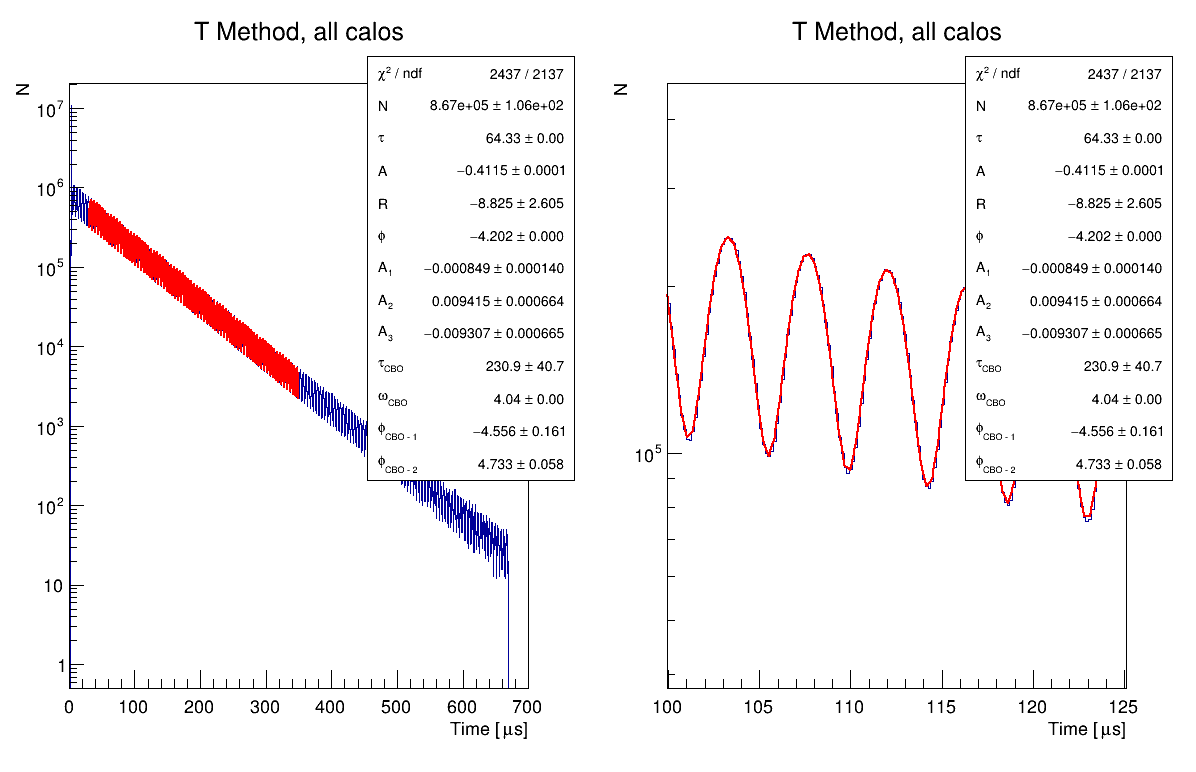

In [15]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle13 = f.Get("farline").Get("allCaloWiggle").Clone()

allCaloWiggle13.GetXaxis().SetLimits(allCaloWiggle13.GetXaxis().GetXmin() / 1000 * 1.25,
                                     allCaloWiggle13.GetXaxis().GetXmax() / 1000 * 1.25)
allCaloWiggle13.GetXaxis().SetTitle("Time [#mus]")

residuals13 = allCaloWiggle13.Clone() # this will be filled with the fit residuals later

for i in range(2): #the fit won't converge the first time. Don't look at me like that!
    allCaloWiggle13.Fit("func13","REM")

allCaloWiggle13.Draw()

c2.cd(2)
ding13 =  allCaloWiggle13.Clone()
ding13.GetXaxis().SetRangeUser(100,125)
ding13.Draw()

r.gPad.SetLogy()
c2.Draw()

Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_TmethodWiggleFitAllCalos_13Parameter.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_TmethodWiggleFitAllCalos_13Parameter.root has been created


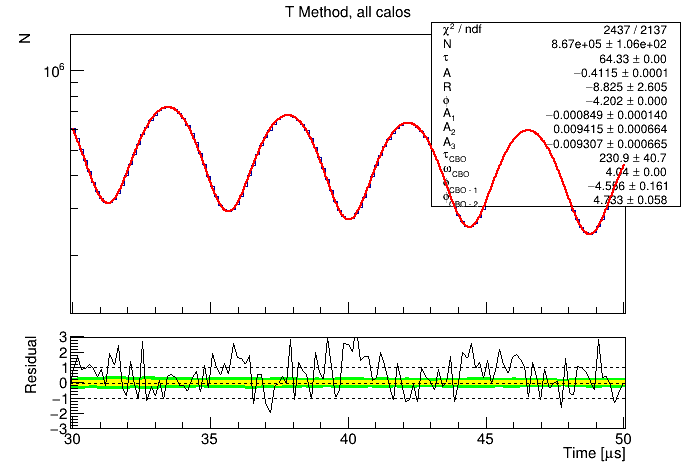

In [16]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas()
allCaloWiggle13.Draw()
c3.SetLogy()
c3.Draw()

rp13 = r.TRatioPlot(allCaloWiggle13)
rp13.Draw()
rp13.GetLowerRefYaxis().SetTitle("Residual")
rp13.GetLowerRefYaxis().SetRangeUser(-3,3)

allCaloWiggle13.GetXaxis().SetRangeUser(30,50)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos_13Parameter.png")
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos_13Parameter.root")

### Fourier xform of the residuals from the 13 parameter fit

4700
0.14893617021276595 wide
4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715


Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_13ParamResiduals.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_13ParamResiduals.root has been created


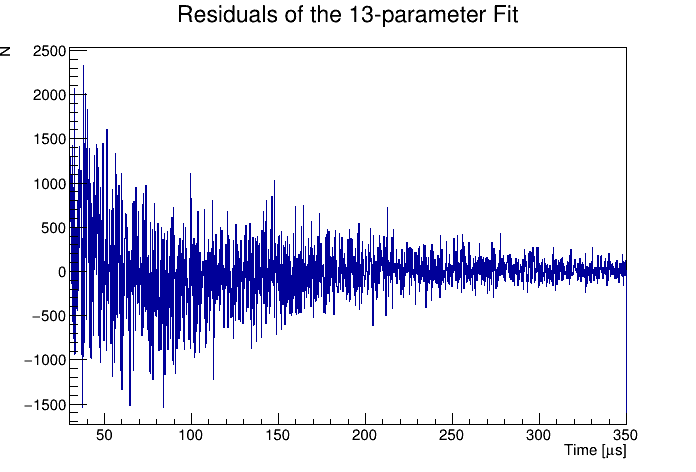

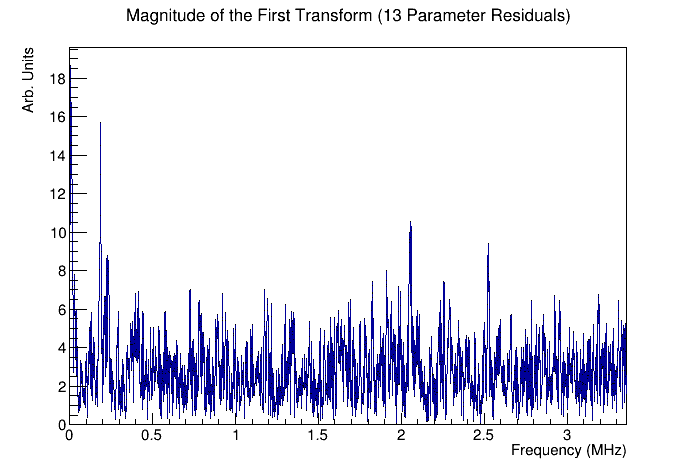

In [17]:
c3 = r.TCanvas()
residuals13param = residuals13.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals13param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
for i in range(nBins):
    binCenterX = allCaloWiggle13.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30):
        residuals13param.SetBinContent(i, allCaloWiggle13.GetBinContent(i) - func13.Eval(binCenterX))
    else:
        residuals13param.SetBinContent(i, 0)

residuals13param.Draw()
residuals13param.GetXaxis().SetRangeUser(30,350)
residuals13param.SetTitle("Residuals of the 13-parameter Fit")
c3.Draw()

print(residuals13param.GetBinWidth(2), "wide")

hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals13param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (13 Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals13param.GetSize() - 2
minBinCenter = residuals13param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals13param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
nbins = residuals13param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)

c2.Draw()
c2.Print("./images/"+prodString+"/"+prodString+"_13ParamResiduals.png")
c2.Print("./images/"+prodString+"/"+prodString+"_13ParamResiduals.root")

### Comaprison of the 5 and 13 parameter fit residual FFT's

Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_ResidualComparison5_13.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_ResidualComparison5_13.root has been created


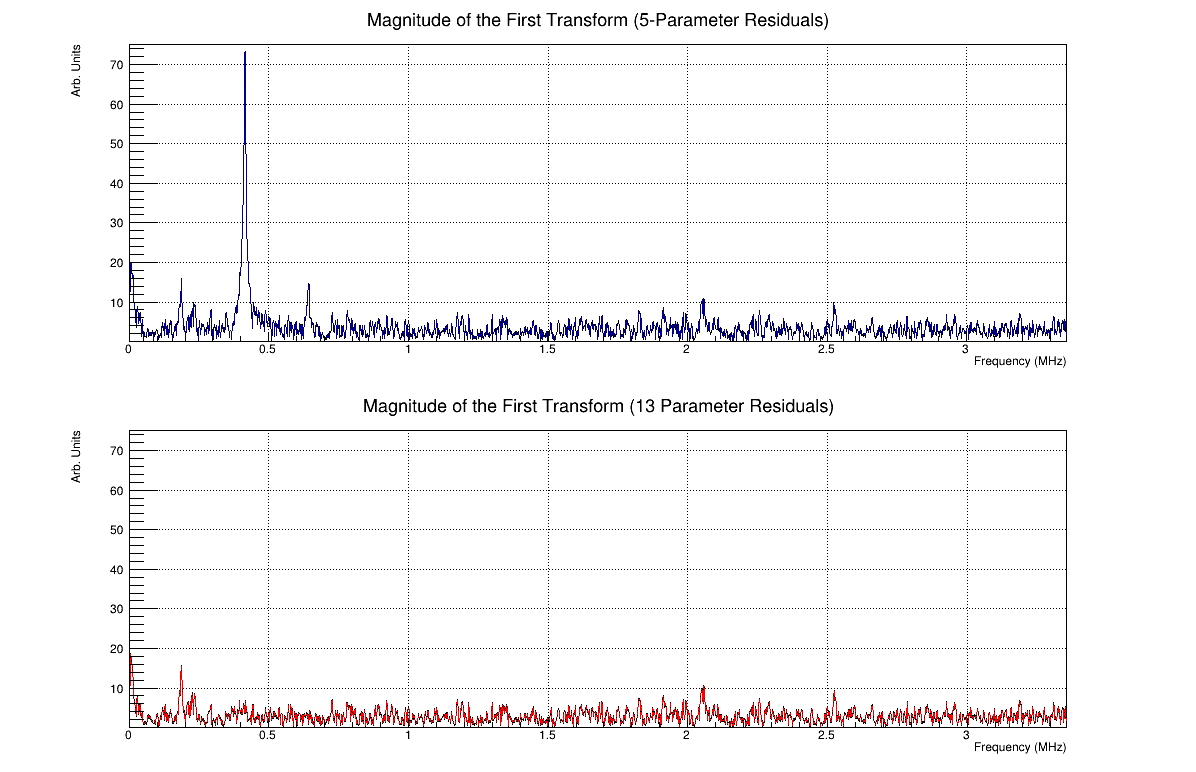

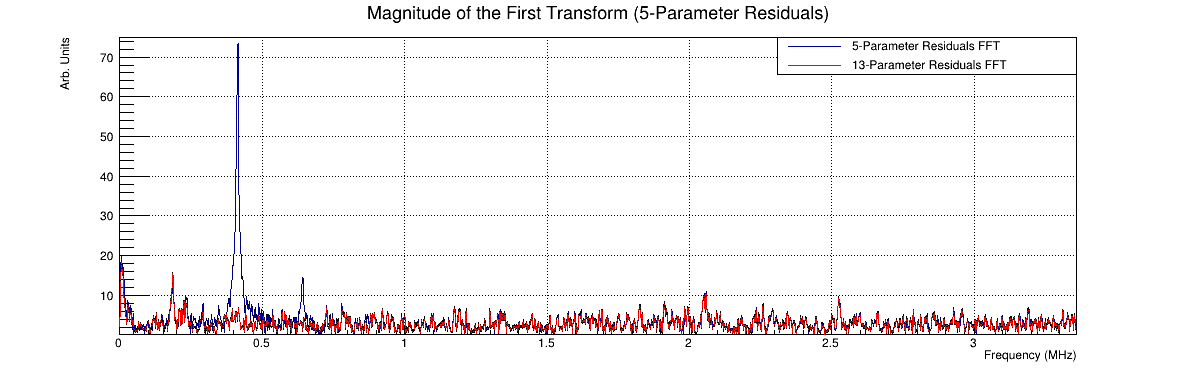

In [18]:
c5 = r.TCanvas("c5","c5",1200,800)
c5.Divide(1,2)
c5.cd(1)
#r.gPad.SetLogy()
r.gPad.SetGrid()

residuals5paramXform.Draw("HIST P0 L")
residuals5paramXform.GetYaxis().SetRangeUser(0.1,75)
c5.cd(2)
#r.gPad.SetLogy()
r.gPad.SetGrid()
hxform.Draw("HIST P0 L")
hxform.GetYaxis().SetRangeUser(0.1,75)

residuals13paramXform = hxform.Clone()

c5.Draw()

c6 = r.TCanvas("c6","c6",1200,400)
residuals5paramXform.Draw("HIST P0 L")
hxform.SetLineColor(2)
hxform.Draw("HIST P0 L SAME")
leg = r.TLegend(0.65,0.8,0.9,0.9)
leg.AddEntry(residuals5paramXform ,"5-Parameter Residuals FFT", "l")
leg.AddEntry(hxform ,"13-Parameter Residuals FFT", "l")
leg.Draw()
c6.SetGrid()
c6.Draw()

c6.Print("./images/"+prodString+"/"+prodString+"_ResidualComparison5_13.png")
c6.Print("./images/"+prodString+"/"+prodString+"_ResidualComparison5_13.root")

In [19]:
parameters13 = []
for i in range(13):
    parameters13.append( (func13.GetParameter(i) , func13.GetParError(i)) )
print(parameters13)
par13,parErr13 = zip(*parameters13)
print(par13)

[(866979.3203331854, 106.36258498911228), (64.3254144687465, 0.004646300284140601), (-0.4115089971535262, 8.631398009253141e-05), (-8.824563437460608, 2.604539479926278), (-4.2021753295658755, 0.00040846877566780293), (-0.0008490211620460811, 0.00013976893102689305), (0.00941475057848352, 0.0006641821869390183), (-0.009307336000776777, 0.0006654921013970898), (230.91702484352817, 40.70491736758865), (4.039912060549288, 0.0005315799687945957), (-4.556164185648173, 0.16127217738634414), (4.732727368200535, 0.058307490442402354), (0.0, 0.0)]
(866979.3203331854, 64.3254144687465, -0.4115089971535262, -8.824563437460608, -4.2021753295658755, -0.0008490211620460811, 0.00941475057848352, -0.009307336000776777, 230.91702484352817, 4.039912060549288, -4.556164185648173, 4.732727368200535, 0.0)


# Now lets make some plots from the individual calorimeters.

Starting Calo 1
Starting Calo 2
Starting Calo 3
Starting Calo 4
Starting Calo 5
Starting Calo 6
Starting Calo 7
Starting Calo 8
Starting Calo 9
Starting Calo 10
Starting Calo 11
Starting Calo 12
Starting Calo 13
Starting Calo 14
Starting Calo 15
Starting Calo 16
Starting Calo 17
Starting Calo 18
Starting Calo 19
Starting Calo 20
Starting Calo 21
Starting Calo 22
Starting Calo 23
Starting Calo 24


Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_calo01_FullSet.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_calo01_FullSet.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_calo02_FullSet.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_calo02_FullSet.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_calo03_FullSet.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_calo03_FullSet.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_calo04_FullSet.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_calo04_FullSet.root has been cr

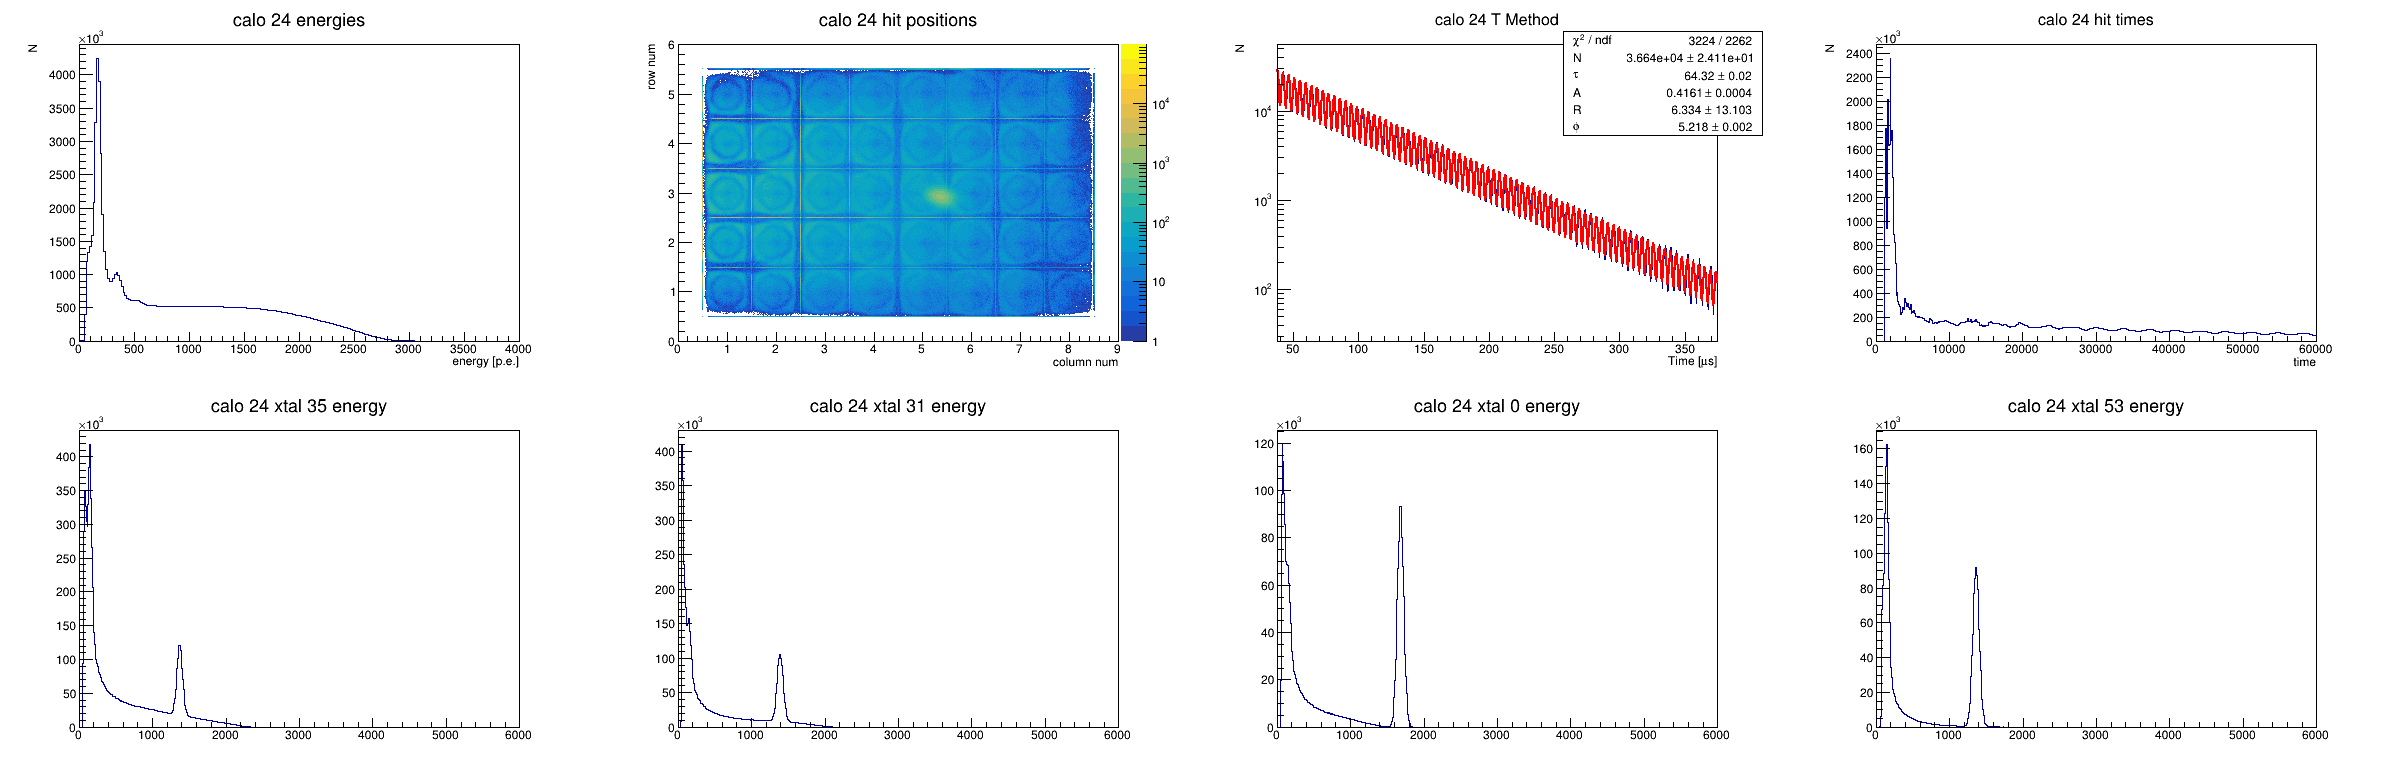

In [20]:
caloNum = 1

wiggleFitParamVec = []

caloiWiggleVec = []

for caloNum in range(1,25):
    print("Starting Calo", caloNum)
    
    c4 = r.TCanvas("c4","c4",2400,800)
    c4.Divide(4,2)

    c4.cd(1)
    caloiEnergy = f.Get("farline").Get("calo"+str(caloNum)).Get("energy").Clone()
    caloiEnergy.Draw()
    c4.Draw()

    c4.cd(2)
    caloiXtalHits = f.Get("farline").Get("calo"+str(caloNum)).Get("hitPositions").Clone()
    caloiXtalHits.Draw("colz")
    r.gPad.SetLogz()

    c4.cd(3)
    caloiWiggle = f.Get("farline").Get("calo"+str(caloNum)).Get("wiggle").Clone()
    caloiWiggle.GetXaxis().SetRangeUser(30000,300000)
    caloiWiggle.Draw()
    r.gPad.SetLogy()

    caloiWiggle.GetXaxis().SetLimits(caloiWiggle.GetXaxis().GetXmin() / 1000 * 1.25,caloiWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    caloiWiggle.GetXaxis().SetTitle("Time [#mus]")
    
    for i in range(2):
        caloiWiggle.Fit("func","REMQ")
    
    wiggleFitParamVec.append( ( func.GetParameter(3) , func.GetParError(3) ) )
    caloiWiggleVec.append( caloiWiggle.Clone("calo"+str(caloNum).zfill(2)+" Wiggle Plot") )

    c4.cd(4)
    caloiTimes = f.Get("farline").Get("calo"+str(caloNum)).Get("times").Clone()
    caloiTimes.GetXaxis().SetRangeUser(0,60000)
    caloiTimes.Draw()

    c4.cd(5)
    caloiXtal35Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal35Energy").Clone()
    caloiXtal35Energy.Draw()

    c4.cd(6)
    caloiXtal31Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal31Energy").Clone()
    caloiXtal31Energy.Draw()

    c4.cd(7)
    caloiXtal0Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal0Energy").Clone()
    caloiXtal0Energy.Draw()

    c4.cd(8)
    caloiXtal53Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal53Energy").Clone()
    caloiXtal53Energy.Draw()

    c4.Draw()
    c4.Print("./images/"+prodString+"/"+prodString+"_calo"+str(caloNum).zfill(2)+"_FullSet.png")
    c4.Print("./images/"+prodString+"/"+prodString+"_calo"+str(caloNum).zfill(2)+"_FullSet.root")

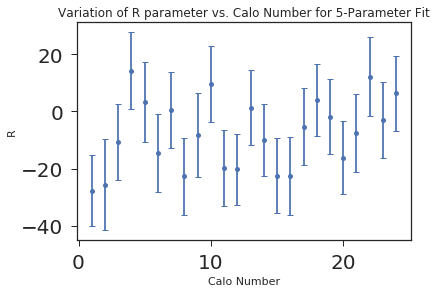

In [21]:
pars, parErrs = zip(*wiggleFitParamVec)
calos = [x for x in range(1,25)]
plt.errorbar(x=calos,y=pars,yerr=parErrs,ls='none',capsize=3,capthick=1,marker='o',markersize=5)
plt.title("Variation of R parameter vs. Calo Number for 5-Parameter Fit")
plt.xlabel("Calo Number")
plt.ylabel("R")
plt.show()

[<ROOT.TH1D object ("calo01 Wiggle Plot") at 0x7fffd2909ff0>, <ROOT.TH1D object ("calo02 Wiggle Plot") at 0x7fffd414f210>, <ROOT.TH1D object ("calo03 Wiggle Plot") at 0x7fe4262e64c0>, <ROOT.TH1D object ("calo04 Wiggle Plot") at 0x7fe425eb66d0>, <ROOT.TH1D object ("calo05 Wiggle Plot") at 0x7fffd41ad050>, <ROOT.TH1D object ("calo06 Wiggle Plot") at 0x7fffd41c5470>, <ROOT.TH1D object ("calo07 Wiggle Plot") at 0x7fffd42069c0>, <ROOT.TH1D object ("calo08 Wiggle Plot") at 0x7fffd41dda50>, <ROOT.TH1D object ("calo09 Wiggle Plot") at 0x7fffd4203a30>, <ROOT.TH1D object ("calo10 Wiggle Plot") at 0x7fe424672620>, <ROOT.TH1D object ("calo11 Wiggle Plot") at 0x7fe4246700d0>, <ROOT.TH1D object ("calo12 Wiggle Plot") at 0x7fe423dad590>, <ROOT.TH1D object ("calo13 Wiggle Plot") at 0x7fe423224c10>, <ROOT.TH1D object ("calo14 Wiggle Plot") at 0x7fe423228800>, <ROOT.TH1D object ("calo15 Wiggle Plot") at 0x7fe4220ff310>, <ROOT.TH1D object ("calo16 Wiggle Plot") at 0x7fe4220e1400>, <ROOT.TH1D object ("cal

Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_Residual5Param_Calo01.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_Residual5Param_Calo01.root has been created
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_Residual5Param_Calo02.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_Residual5Param_Calo02.root has been created
Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TDirectoryFi

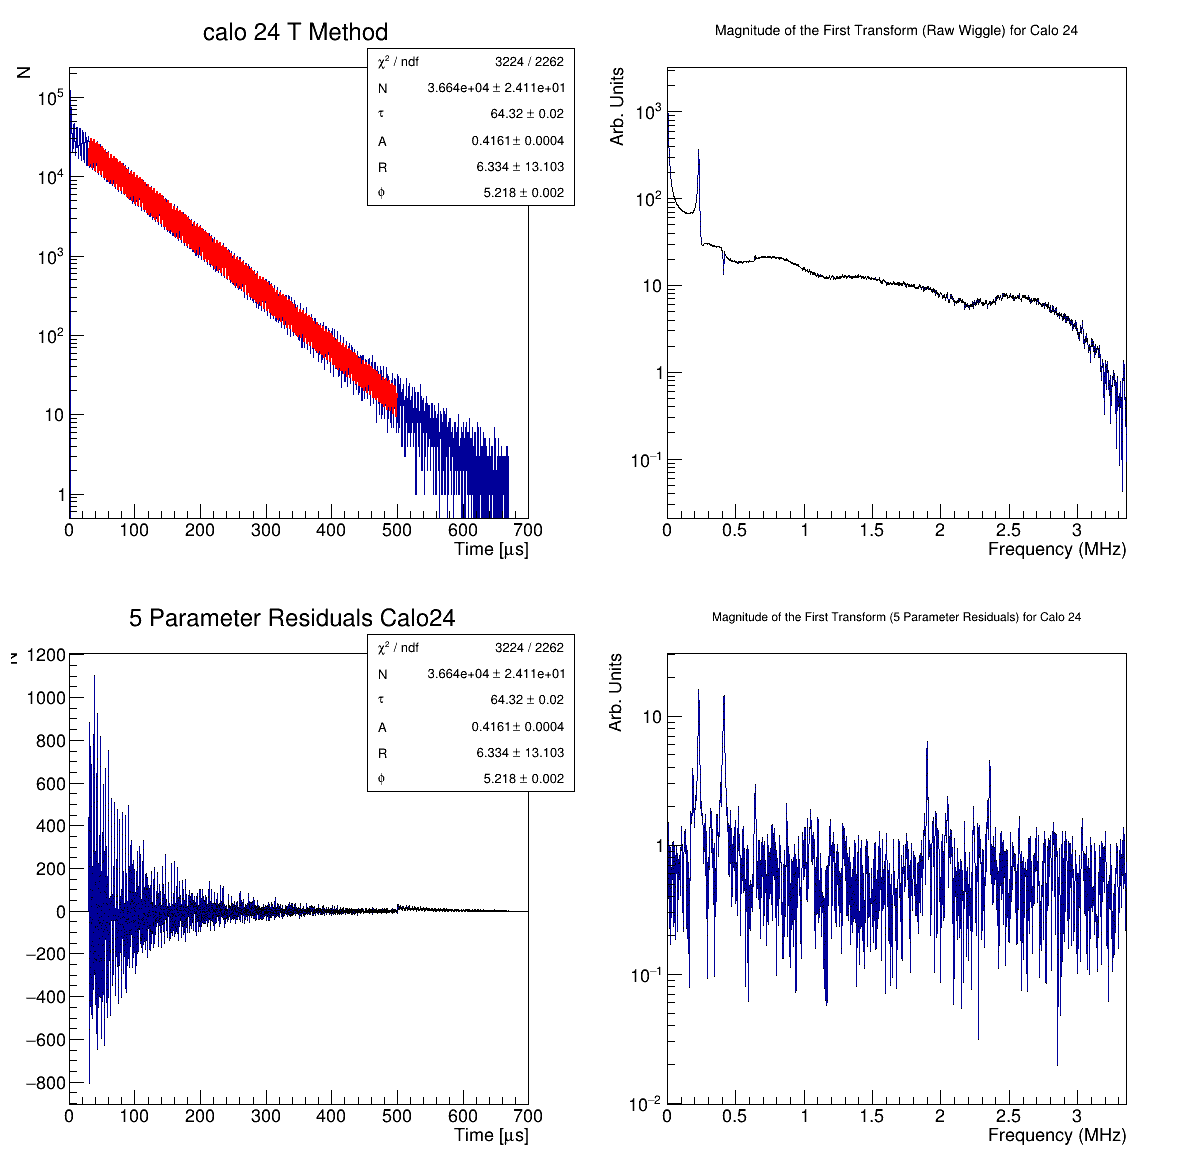

In [22]:
print(caloiWiggleVec)
caloiResidVec = []

for i in range(24):
    caloNum = i+1
    c = r.TCanvas()
    caloiWiggleVec[i].Draw("goff")
    funci = caloiWiggleVec[i].GetFunction("func")
    #c.Draw()
    
#    print("tau = ",funci.GetParameter(1), "for calo", caloNum)
    residuals5paramCaloi = caloiWiggleVec[i].Clone()
    nBins = residuals5paramCaloi.GetSize() - 2
#    print("    ", nbins , "bins" )
    for bini in range(int(nBins) ):
        binCenterX = caloiWiggleVec[i].GetXaxis().GetBinCenter(bini)
        if (binCenterX > 30):
            residuals5paramCaloi.SetBinContent(bini, caloiWiggleVec[i].GetBinContent(bini) - funci.Eval(binCenterX))
        else:
            residuals5paramCaloi.SetBinContent(bini, 0)
            
    residuals5paramCaloi.Draw("HIST P0 L")
#    c.Draw()
    
    hxformRaw = r.TH1D()
    hxformRaw = 0
    r.TVirtualFFT.SetTransform(0)
    hxformRaw = caloiWiggleVec[i].FFT(hxform,"MAG P")
    hxformRaw.SetTitle("Magnitude of the First Transform (Raw Wiggle) for Calo "+str(caloNum))
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxformRaw.GetEntries()
    hxformRaw.Scale(1/normXform)
    c2 = r.TCanvas()
    c2.cd()
    #c2.SetLogy()
    hxformRaw.GetXaxis().SetTitle("Frequency (MHz)")
    hxformRaw.GetYaxis().SetTitle("Arb. Units")
    hxformRaw.Draw("HIST P0 L")
#    c2.Draw()
    
    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    hxform = residuals5paramCaloi.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform (5 Parameter Residuals) for Calo "+str(caloNum))
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    c2 = r.TCanvas()
    c2.cd()
    #c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("HIST P0 L")
#    c2.Draw()

    Npart = residuals5paramCaloi.GetSize() - 2
    minBinCenter = residuals5paramCaloi.GetXaxis().GetBinCenter(0)
    maxBinCenter = residuals5paramCaloi.GetXaxis().GetBinCenter(Npart)

    capT = maxBinCenter - minBinCenter
#    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
#    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10,6)

    limmax = 2*deltaF*Npart #400-25
#    print(limmax,limmaxMHz)
    nbins = residuals5paramCaloi.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
    caloiResidVec.append( hxform.Clone() )
    
    hxformRaw.SetBins(Npart,0,limmaxMHz)
    hxformRaw.GetXaxis().SetRangeUser(0,limmaxMHz/2)
    
    caloiWiggleVec[i].GetXaxis().SetRangeUser(0,700)
    residuals5paramCaloi.GetXaxis().SetRangeUser(0,700)
    
    c3 = r.TCanvas("c3","c3",1200,1200)
    c3.Divide(2,2)
    c3.cd(1)
    caloiWiggleVec[i].Draw()
    r.gPad.SetLogy()    
    c3.cd(2)
    r.gPad.SetLogy()    
    hxformRaw.Draw("HIST P0 L")
    c3.cd(3)
    residuals5paramCaloi.SetTitle("5 Parameter Residuals Calo"+str(caloNum))
    residuals5paramCaloi.Draw("HIST P0 L")
    c3.cd(4)
    r.gPad.SetLogy()    
    hxform.Draw("HIST P0 L")
    c3.Draw()
    c3.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_Calo"+str(caloNum).zfill(2)+".png")
    c3.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_Calo"+str(caloNum).zfill(2)+".root")   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_Residual5Param_all.root has been created
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_Residual5Param_all.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c7
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_Residual5Param_allSum.root has been created
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_Residual5Param_allSum.png has been created


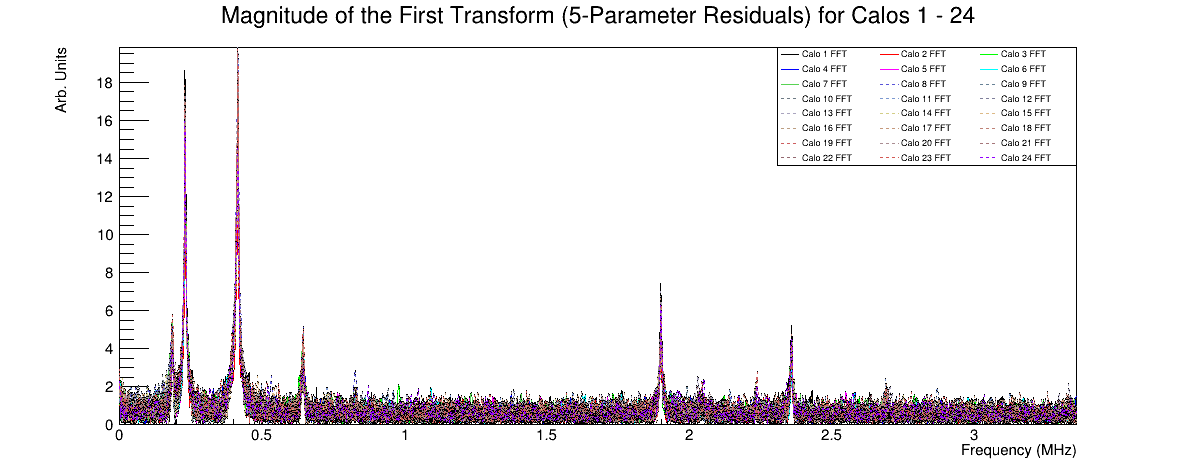

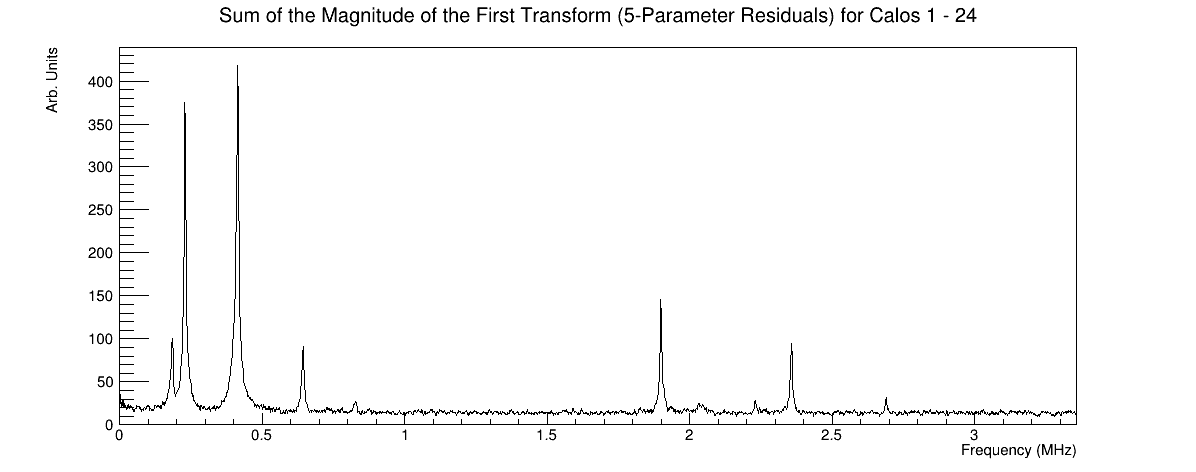

In [68]:
c6 = r.TCanvas("c6","c6",1200,500)
leg = r.TLegend(0.65,0.65,0.9,0.9)
c6.cd()
for i, hist in enumerate(caloiResidVec):
    hist.SetLineColor(i+1)
    if(i>3):
        hist.SetLineColor(i+2)
    if(i>6):
        hist.SetLineStyle(2)
    if(i>7):
        hist.SetLineColor(i+40-12)
    if (i < 0.9):
        hist.SetTitle("Magnitude of the First Transform (5-Parameter Residuals) for Calos 1 - 24")
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist ,"Calo "+str(i+1)+" FFT", "l")

leg.SetNColumns(3)
leg.Draw()
c6.Draw()
c6.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_all.root")
c6.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_all.png")

c7 = r.TCanvas("c7","c7",1200,500)
hsum = caloiResidVec[0].Clone()
for i in range(1,24):
    hsum.Add(caloiResidVec[i])
hsum.SetTitle("Sum of the Magnitude of the First Transform (5-Parameter Residuals) for Calos 1 - 24")
hsum.Draw("HIST P0 L")
c7.Draw()
c7.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_allSum.root")
c7.Print("./images/"+prodString+"/"+prodString+"_Residual5Param_allSum.png")

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_hitDistribution_calo01.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_hitDistribution_calo01.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_hitDistribution_calo02.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_hitDistribution_calo02.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_hitDistribution_calo03.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_hitDistribution_calo03.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_hitDistribution_calo04.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./ima

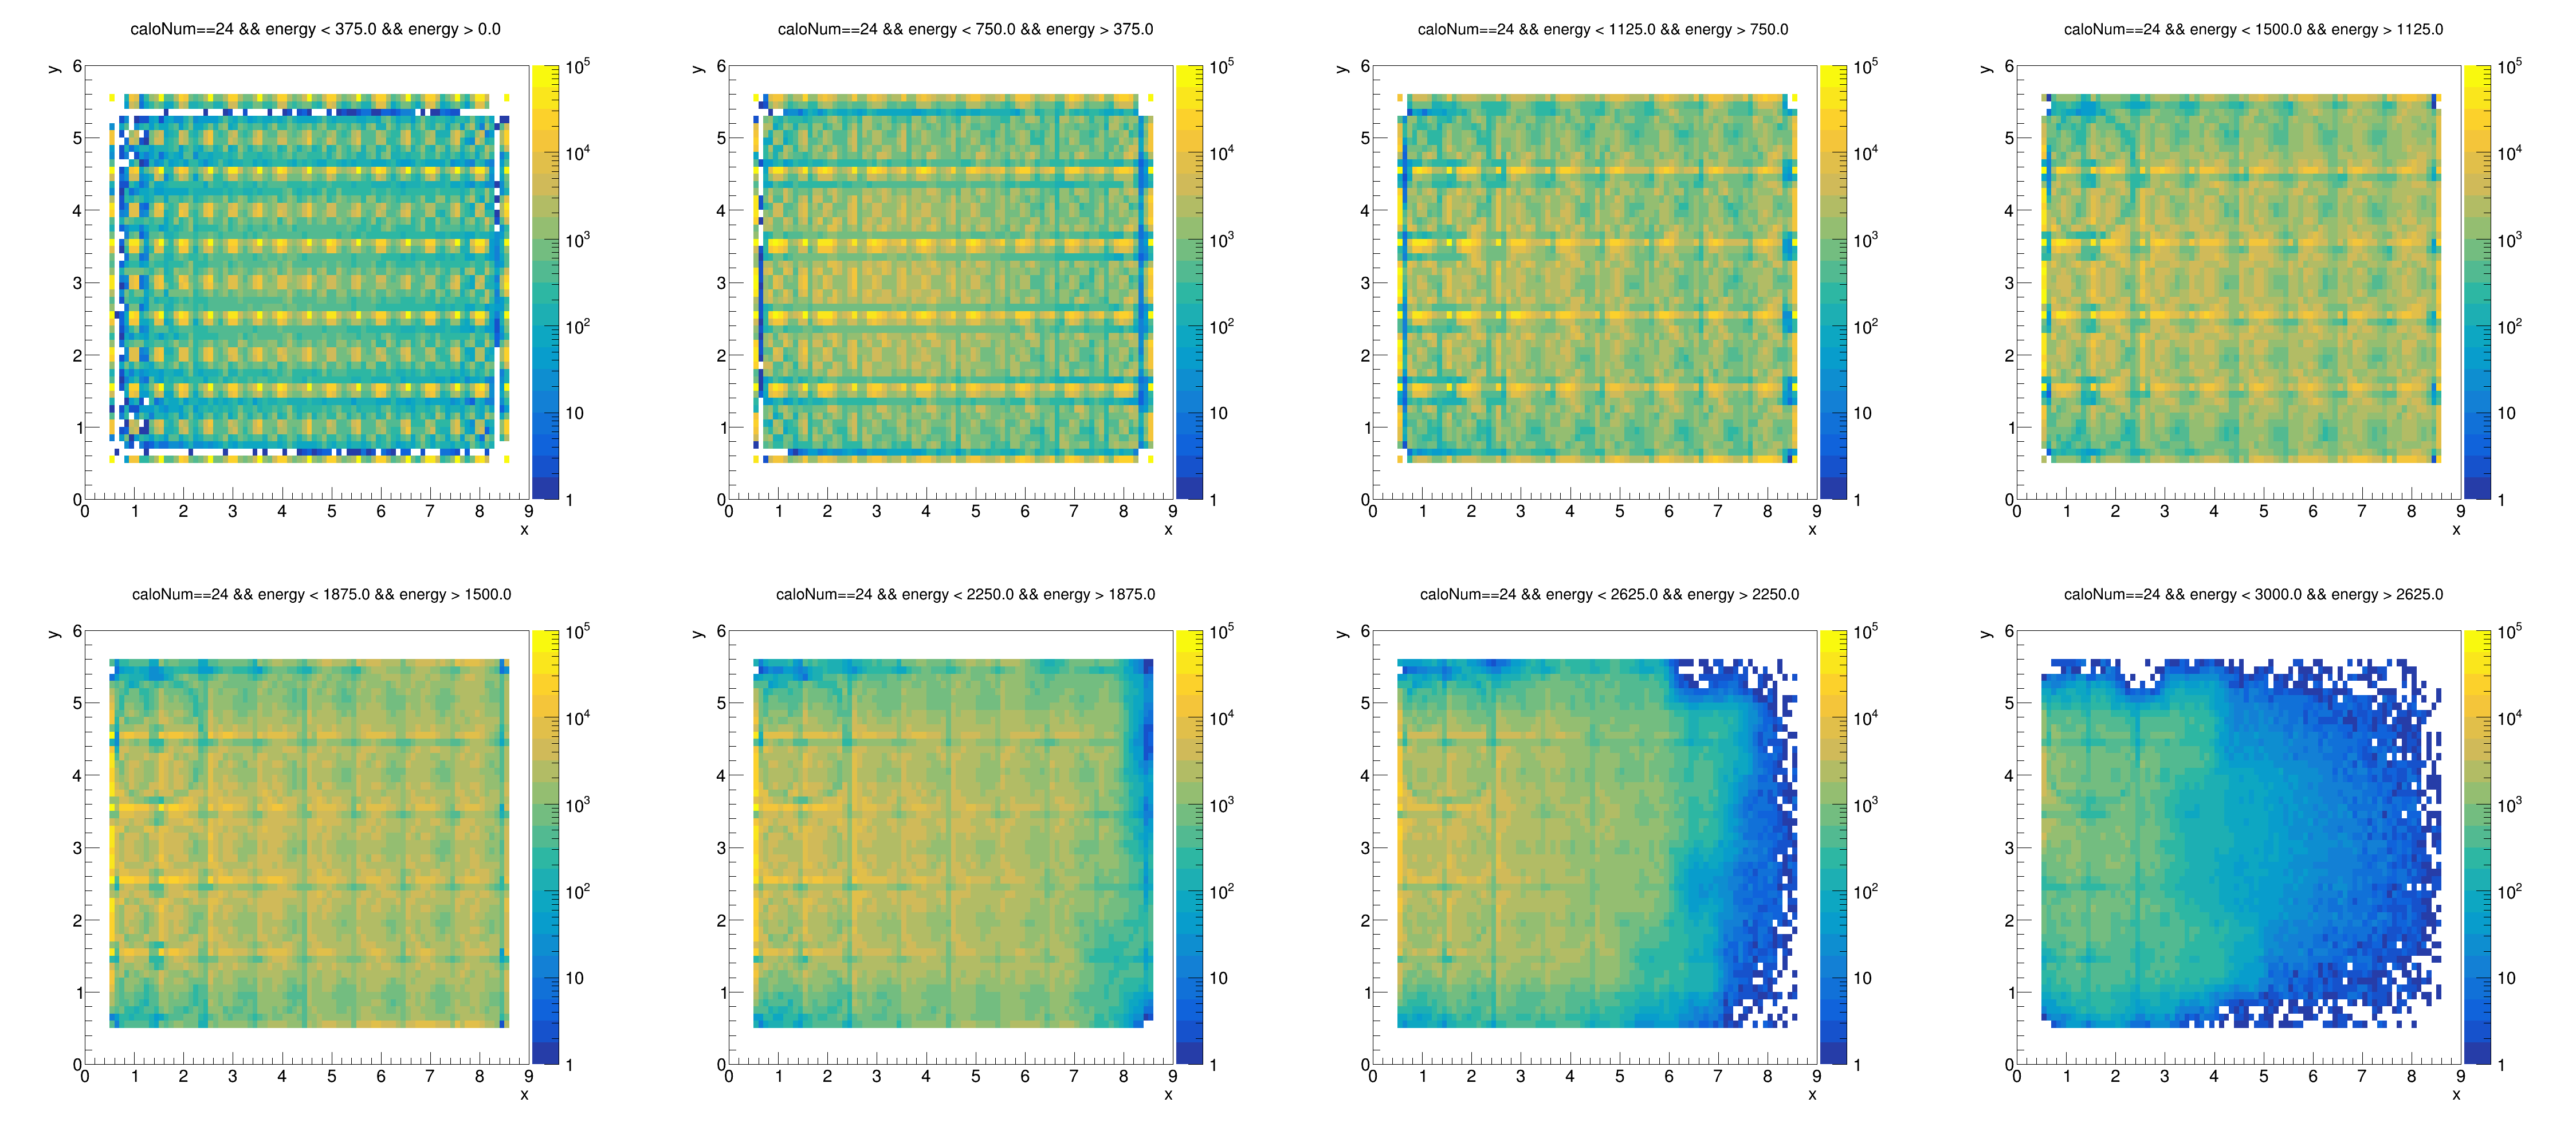

In [24]:
for calo in range(1,25):
    print("Starting calo", calo)
    c = r.TCanvas("c","c",4500,2000)
    c.Divide(4,2)
    for i in range(8):
        c.cd(i+1)
        hi = f2.Get("hitDistribution_calo"+str(calo).zfill(2)+"_div"+str(i)).Clone()
        hi.Rebin2D(10,10)
        hi.GetXaxis().SetTitle("x")
        hi.GetYaxis().SetTitle("y")
        r.gPad.SetLogz()
        r.gPad.SetRightMargin(0.15)
        hi.GetZaxis().SetRangeUser(1,100000)
        hi.Draw("COLZ")
    c.Draw()
    c.Print("./images/"+prodString+"/"+prodString+"_hitDistribution_calo"+str(calo).zfill(2)+".png")
    c.Print("./images/"+prodString+"/"+prodString+"_hitDistribution_calo"+str(calo).zfill(2)+".root")

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_energySpectrum_calo01.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_energySpectrum_calo01.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_energySpectrum_calo02.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_energySpectrum_calo02.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_energySpectrum_calo03.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_energySpectrum_calo03.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_energySpectrum_calo

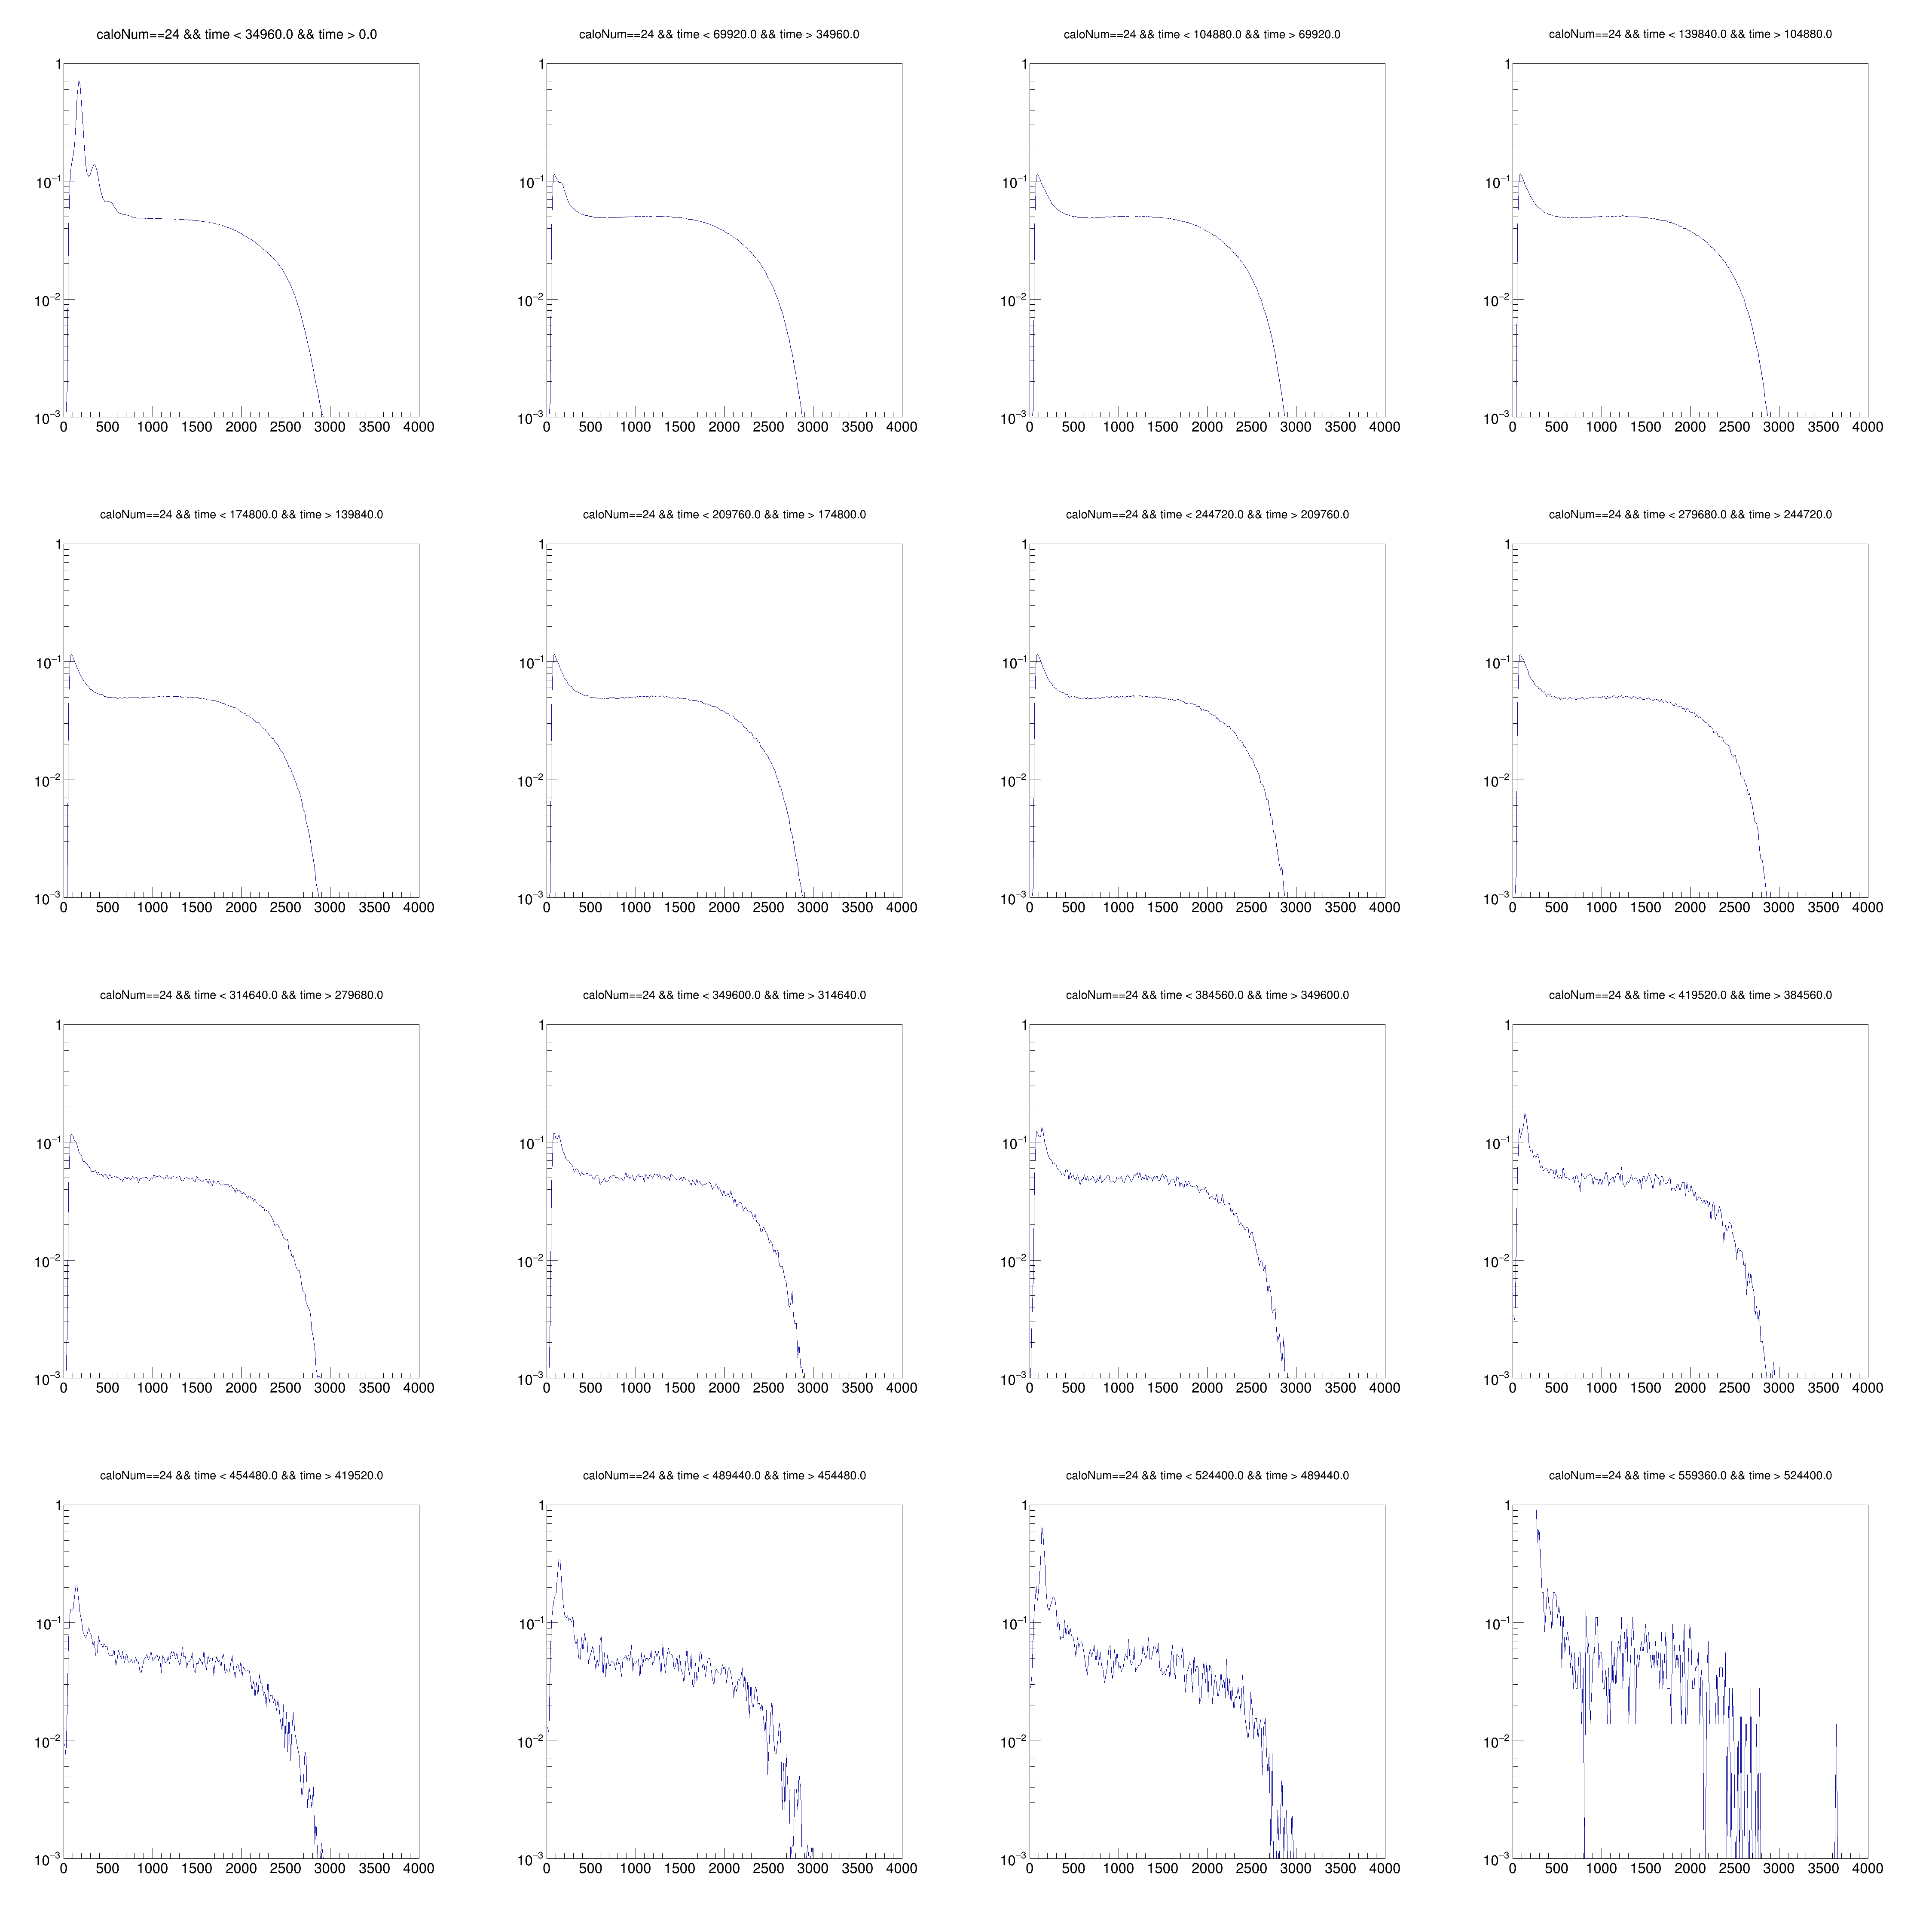

In [25]:
for calo in range(1,25): 
    print("Starting calo", calo)
    c3 = r.TCanvas("c3","c3",4500,4500)
    c3.Divide(4,4)

    nDivs = 16
    for div in range(nDivs):
        c3.cd(div+1)
        r.gROOT.SetSelectedPad(r.gPad)
        
        hi = f2.Get("energySpectrum_calo"+str(calo).zfill(2)+"_div"+str(div))
        int2000_3000 = hi.Integral( hi.FindBin(2000), hi.FindBin(3000) )
        intTotal = hi.Integral()
        if(np.abs(int2000_3000) > 0):
            hi.Scale(1/int2000_3000)
            #hi.Scale(1/intTotal)
        hi.GetYaxis().SetRangeUser(0.001,1)
        hi.Draw("HIST P0 L")

        r.gPad.SetLogy()
        
    c3.Draw()

    c3.Print("./images/"+prodString+"/"+prodString+"_energySpectrum_calo"+str(calo).zfill(2)+".png")
    c3.Print("./images/"+prodString+"/"+prodString+"_energySpectrum_calo"+str(calo).zfill(2)+".root")

Starting calo 1
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo01.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo01.root has been created
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo02.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo02.root has been created
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo03.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo03.root has been created
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo04.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo04.root has been created
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_laserEnergyPulse_calo05.png has been created
Info in <TCanvas::SaveAs>

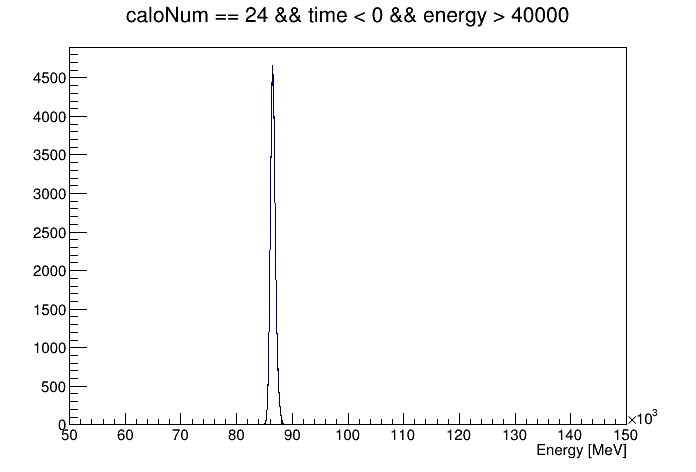

In [49]:
for calo in range(1,25): 
    print("Starting calo", calo)
    c3 = r.TCanvas()

    hi = f2.Get("laserEnergyPulse_calo"+str(calo).zfill(2))
    hi.GetXaxis().SetTitle("Energy [MeV]")
    hi.Draw("HIST P0 L")
        
    c3.Draw()

    c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_calo"+str(calo).zfill(2)+".png")
    c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_calo"+str(calo).zfill(2)+".root")

Starting calo 1
-12.264823360216775
Starting calo 2
Starting calo 3
Starting calo 4
Starting calo 5
Starting calo 6
Starting calo 7
Starting calo 8
Starting calo 9
Starting calo 10
Starting calo 11
Starting calo 12
Starting calo 13
Starting calo 14
Starting calo 15
Starting calo 16
Starting calo 17
Starting calo 18
Starting calo 19
Starting calo 20
Starting calo 21
Starting calo 22
Starting calo 23
Starting calo 24


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ./images/v9_05_00/v9_05_00_laserEnergyPulse_allcalo.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_05_00/v9_05_00_laserEnergyPulse_allcalo.root has been created


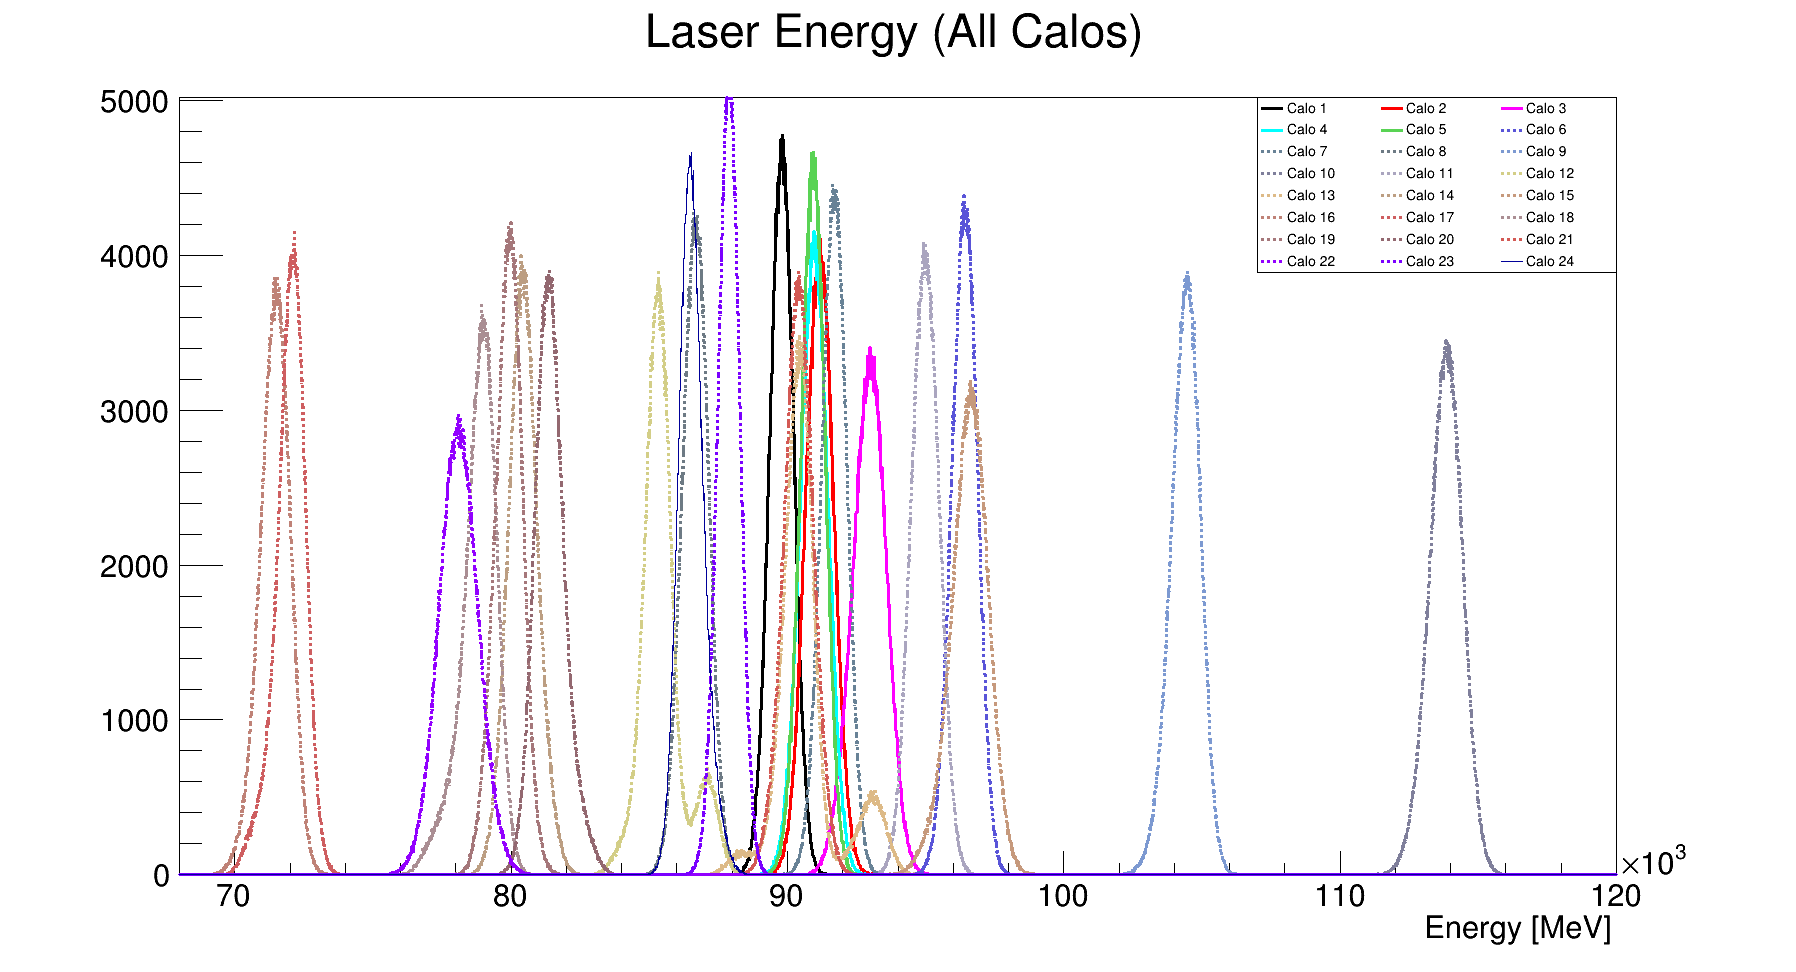

In [70]:
c3 = r.TCanvas("c3","c3",1800,1000)
leg = r.TLegend(0.7,0.72,0.9,0.9)
leg.SetNColumns(3)

for calo in range(1,25): 
    print("Starting calo", calo)

    hi.SetLineColor(calo-1)
    hi.SetLineWidth(3)
    if(calo>3):
        hi.SetLineColor(calo+2)
    if(calo>6):
        hi.SetLineStyle(2)
    if(calo>7):
        hi.SetLineColor(calo+40-12)
    
    hi = f2.Get("laserEnergyPulse_calo"+str(calo).zfill(2))
    hi.SetDirectory(0)
    hi.GetXaxis().SetTitle("Energy [MeV]")
    hi.SetTitle("Laser Energy (All Calos)")
    hi.GetXaxis().SetRangeUser(68000,120000)
    if calo < 1.5:
        print(ding)
        hi.Draw()
    else:
        hi.Draw("SAME")
        
    leg.AddEntry(hi ,"Calo "+str(calo), "l")

leg.Draw()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_allcalo.png")
c3.Print("./images/"+prodString+"/"+prodString+"_laserEnergyPulse_allcalo.root")